In [28]:
import pandas as pd
import numpy as np
import openpyxl
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import os

In [29]:
def get_db_engine():
    load_dotenv()

    user = os.getenv('DB_USER')
    password = os.getenv('DB_PASSWORD')
    host = os.getenv('DB_HOST')
    port = os.getenv('DB_PORT')
    database = os.getenv('DB_NAME')

    engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')
    return engine

In [30]:
df = pd.read_sql_query("SELECT * FROM reports;", engine)

In [7]:
display(df)

,id,type_document,name_document,label,inital_value,final_value,edit,is_null
0,5,cnh,01_cnh,doc_identidade->doc_identidade-org._emissor-uf,732213587,732213587,False,False
1,6,cnh,01_cnh,nome,PESSONI VALDILEI EMY,PESSONI VALDILEI EMY,False,False
2,7,cnh,01_cnh,nome_mae->filiacao,FRAGA ADONIS CASAL LIMA,FRAGA ADONIS CASAL LIMA,False,False
3,21,rg,03_rg,data_expedicao,,26/10/2005,True,True
4,29,recibos,04_recibos,cpf_cnpj_tomador,163.981.026,163.981.026 - 90,True,False
...,...,...,...,...,...,...,...,...
88,78,nfs,06_nfse,numero_rps,"1758,",1758,True,False
89,60,nfs,06_nfse,complemento->prestador_de_servicos,Cpf,,True,False
90,92,comprovante_residencia,07_comprovate_residencia,nome,ANDERSON DA SILVA,ANDERSON DA SILVA PEREIRA,True,False
91,79,nfs,06_nfse,rua->prestador_de_servicos,"AV. JAVAN LESSA RIBEIRO,",AV. JAVAN LESSA RIBEIRO,True,False


In [13]:
# dados incorretos

df_incorrect = df[df['edit'] == True]

display(df_incorrect)

,id,type_document,name_document,label,inital_value,final_value,edit,is_null
3,21,rg,03_rg,data_expedicao,,26/10/2005,True,True
4,29,recibos,04_recibos,cpf_cnpj_tomador,163.981.026,163.981.026 - 90,True,False
5,37,danfe,05_nfe,data_emissao_nf,14 / 01 /,14 / 01 / 2021,True,False
6,52,nfs,06_nfse,Valor_ISS,"0,00","90,89",True,False
7,53,nfs,06_nfse,Valor_de_outras_retencoes,"90,89","0,00",True,False
8,33,recibos,04_recibos,valor_recibo,"11,00","110,00",True,False
9,12,cnh,01_cnh,org._emissor->doc_identidade-org._emissor-uf,SESP GO,SESP,True,False
68,25,rg,03_rg,UF->naturalidade,ITU-SP,SP,True,False
69,1,cnh,01_cnh,cidade->local,CLAUDIO-MG,CLAUDIA-MG,True,False
86,2,cnh,01_cnh,cpf,896.630.040-53,896.256.040-53,True,False


In [15]:
#dados que não pertencem ao documento

df_null = df[df['is_null'] == True]
display(df_null)

,id,type_document,name_document,label,inital_value,final_value,edit,is_null
3,21,rg,03_rg,data_expedicao,,26/10/2005,True,True
87,3,cnh,01_cnh,data_emissao,,17/06/2008,True,True


In [16]:
#dados corretos

df_correct = df[df['edit'] == False]
display(df_correct)

,id,type_document,name_document,label,inital_value,final_value,edit,is_null
0,5,cnh,01_cnh,doc_identidade->doc_identidade-org._emissor-uf,732213587,732213587,False,False
1,6,cnh,01_cnh,nome,PESSONI VALDILEI EMY,PESSONI VALDILEI EMY,False,False
2,7,cnh,01_cnh,nome_mae->filiacao,FRAGA ADONIS CASAL LIMA,FRAGA ADONIS CASAL LIMA,False,False
10,8,cnh,01_cnh,nome_pai->filiacao,IONEDA MIYAKUCHI ZAV SANTOS,IONEDA MIYAKUCHI ZAV SANTOS,False,False
11,9,cnh,01_cnh,numero_do_espelho_da_habilitacao,599905390,599905390,False,False
...,...,...,...,...,...,...,...,...
81,89,comprovante_residencia,07_comprovate_residencia,estado,PE,PE,False,False
82,90,comprovante_residencia,07_comprovate_residencia,logradouro,"RUA NOSSA SENHORA DAS GRACAS,","RUA NOSSA SENHORA DAS GRACAS,",False,False
83,91,comprovante_residencia,07_comprovate_residencia,municipio,RECIFE,RECIFE,False,False
84,93,comprovante_residencia,07_comprovate_residencia,numero,56,56,False,False


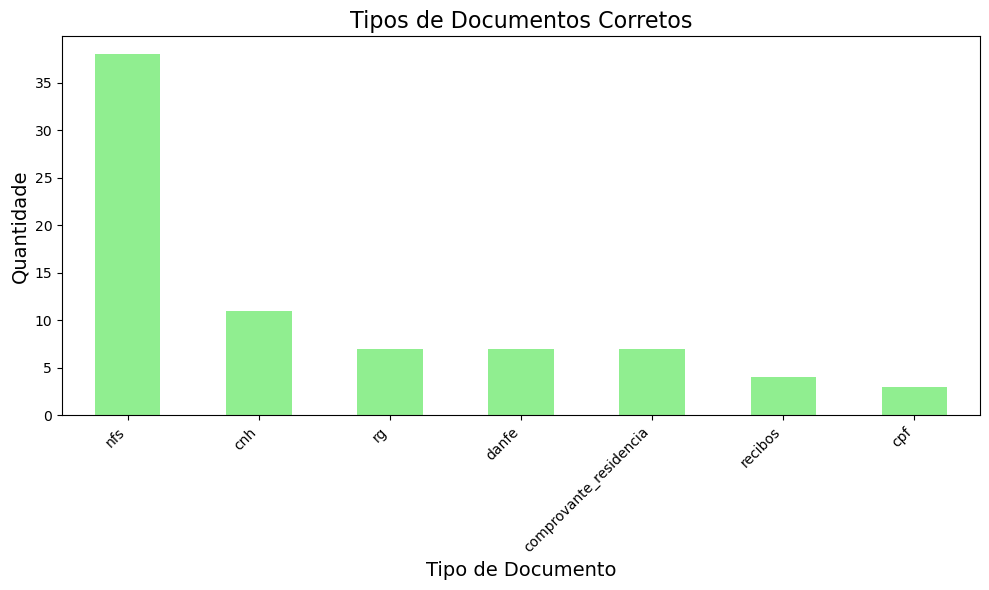

In [51]:
import matplotlib.pyplot as plt

# filtragem dos documentos corretos
df_correct = df[df['edit'] == False]

# quantidade de documentos corretos por tipo de documento
tipo_docs = df_correct['type_document'].value_counts()

# histograma
plt.figure(figsize=(10, 6))
tipo_docs.plot(kind='bar', color='lightgreen')

# configuração do título e os rótulos
plt.title('Tipos de Documentos Corretos', fontsize=16)
plt.xlabel('Tipo de Documento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# exibir o histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('documentos_corretos.png')
plt.show()

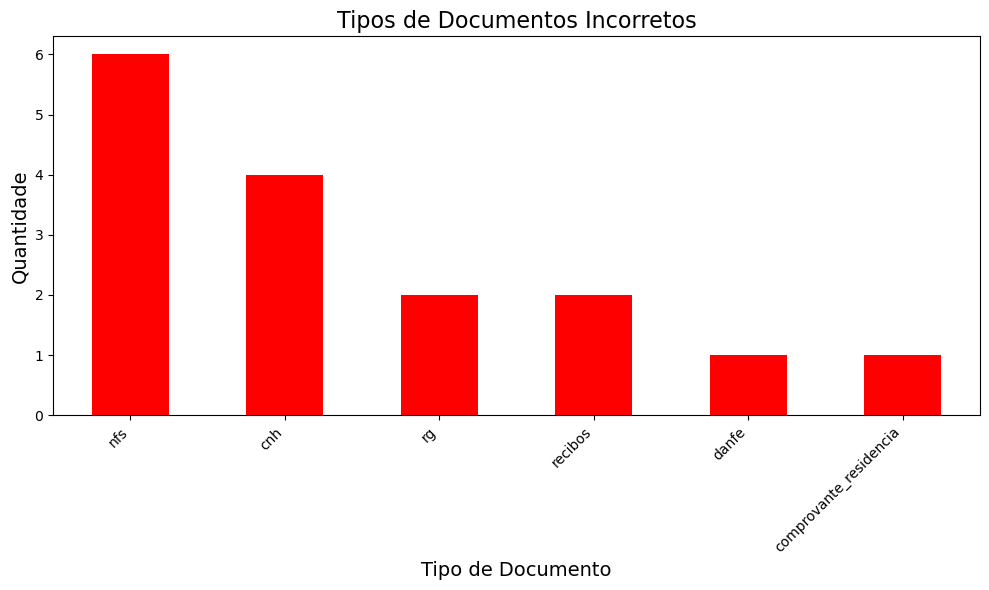

In [52]:
import matplotlib.pyplot as plt

# filtragem dos documentos corretos
df_incorrect = df[df['edit'] == True]

# quantidade de documentos corretos por tipo de documento
tipo_docs = df_incorrect['type_document'].value_counts()

# histograma
plt.figure(figsize=(10, 6))
tipo_docs.plot(kind='bar', color='red')

# configuração do título e os rótulos
plt.title('Tipos de Documentos Incorretos', fontsize=16)
plt.xlabel('Tipo de Documento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# exibir o histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('documentos_incorretos.png')
plt.show()

In [54]:
# libs utilizadas
from openpyxl.styles import PatternFill, Font
from openpyxl import Workbook
from openpyxl.drawing.image import Image

def styling(row):
    if row['edit'] == False:
        return ['background-color: lightgreen' for _ in row]
    else:
        return ['background-color: red' for _ in row]

styled_df = df.style.apply(styling, axis=1)

# porcentagem de corretos e incorretos
percent_correct = (df['edit'] == False).mean() * 100
percent_incorrect = 100 - percent_correct

# gerando excel
with pd.ExcelWriter("relatorio.xlsx", engine="openpyxl") as writer:
    styled_df.to_excel(writer, sheet_name="Dados", index=False)

    workbook  = writer.book
    worksheet = writer.sheets['Dados']
    
    worksheet["A95"] = f"Porcentagem de Corretos: {percent_correct:.2f}%"
    worksheet["A96"] = f"Porcentagem de Incorretos: {percent_incorrect:.2f}%"
    
    worksheet["A95"].font = Font(bold=True, color="006100")  # verde para corretos
    worksheet["A96"].font = Font(bold=True, color="FF0000")  # vermelho para incorretos

    img_corretos = Image('documentos_corretos.png')
    img_corretos.width, img_corretos.height = img_corretos.width * 0.8, img_corretos.height * 0.8
    img_incorretos = Image('documentos_incorretos.png')
    img_incorretos.width, img_incorretos.height = img_incorretos.width * 0.8, img_incorretos.height * 0.8

    # posicionar as imagens nas células
    worksheet.add_image(img_corretos, 'J2')  
    worksheet.add_image(img_incorretos, 'J40')

